<a href="https://colab.research.google.com/github/TimeIsTheChoice/ColabCaffe/blob/master/net_surgery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Error rectify 


> you must adjust this file to correct the error will encounter!



####**1.TypeError: _open() got an unexpected keyword argument 'as_grey'**

alter 


> /usr/local/lib/python3.6/dist-packages/skimage/io/_io.py 



```
img = skimage.img_as_float(skimage.io.imread(filename, as_grey=not color)).astype(np.float32)
```
to
```
img = skimage.img_as_float(skimage.io.imread(filename, as_gray=not color)).astype(np.float32)
```
pycaffe depends on skimage to do image preprocessing. As skimage moved forward in versions, they decided to rename some function argument from as_grey to as_gray.

In [0]:
!cp /content/caffe/python/caffe/io.py /usr/lib/python3/dist-packages/caffe/io.py #alter by Yuhang's rectified code

#### 2.restart


In [0]:
import os
os.kill(os.getpid(), 9)

##Caffe prepare


> simper and fast but without build



In [1]:
!apt-get -y install caffe-cuda
!apt-get -y install caffe-cpu
!git clone https://github.com/TimeIsTheChoice/caffe.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  caffe-tools-cuda cython3 fonts-lyx javascript-common libblosc1
  libcaffe-cuda1 libcublas9.1 libcudart9.1 libcurand9.1 libgflags2.2
  libgoogle-glog0v5 libjs-jquery libjs-jquery-ui libleveldb1v5 liblmdb0
  python-matplotlib-data python-tables-data python3-bs4 python3-caffe-cuda
  python3-chardet python3-cycler python3-dateutil python3-decorator
  python3-gflags python3-h5py python3-html5lib python3-ipython
  python3-ipython-genutils python3-leveldb python3-lxml python3-matplotlib
  python3-networkx python3-nose python3-numexpr python3-olefile python3-pandas
  python3-pandas-lib python3-pexpect python3-pickleshare python3-pil
  python3-pkg-resources python3-prompt-toolkit python3-protobuf
  python3-ptyprocess python3-pygments python3-pyparsing python3-pywt
  python3-scipy python3-simplegeneric python3-six python3-skimage
  python3-skimage

In [0]:
import os
import caffe
dir_name = '/content/caffe'
caffe_root='/content/caffe/'
os.chdir(dir_name) # change directory from working dir to dir with files

In [0]:
#@title Check runtime whetehr gpu or not {display-mode: "form"}
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
# This code will be hidden when the notebook is loaded.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17768785084946323244
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18090815234032236482
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12401019968285415433
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15042773165377239898
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
#@title check GPU memory utilization {display-mode: "form"}
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 
# This code will be hidden when the notebook is loaded.


  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=66abb81a2c7fd4b1ad468121758f39ae4cdacb967e93c9d525582d224144558d
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 25.7 GB  | Proc size: 1.2 GB
GPU RAM Free: 15927MB | Used: 353MB | Util   2% | Total 16280MB


# Net Surgery

Caffe networks can be transformed to your particular needs by editing the model parameters. The data, diffs, and parameters of a net are all exposed in pycaffe.

Roll up your sleeves for net surgery with pycaffe!

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/content/caffe'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Designer Filters

To show how to load, manipulate, and save parameters we'll design our own filters into a simple network that's only a single convolution layer. This net has two blobs.
>`data` for the input and 

>`conv` for the convolution output and one parameter

> `conv` for the convolution filter weights and biases.

In [0]:
dir_name="/content/caffe/examples"
os.chdir(dir_name)

blobs odict_keys(['data', 'conv'])
params odict_keys(['conv'])
------------------------------
[('data', (1, 1, 100, 100)), ('conv', (1, 3, 96, 96))]
[('conv', (3, 1, 5, 5))]


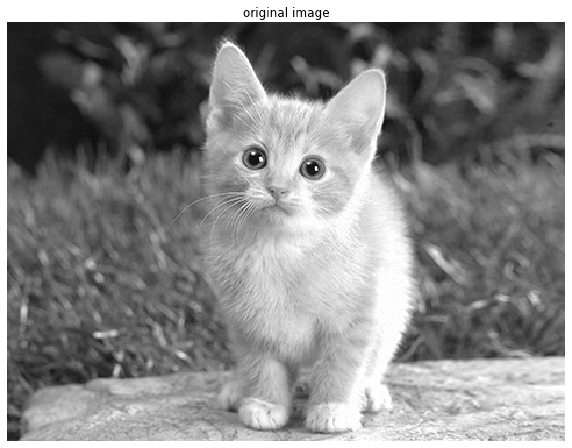

In [30]:
# Load the net, list its data and params, and filter an example image.
caffe.set_mode_cpu()
net = caffe.Net('net_surgery/conv.prototxt', caffe.TEST)
#.keys() :get params/blob as list
print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))
print("------------------------------")
print([(k, v.data.shape) for k, v in net.blobs.items()])
print([(k, v[0].data.shape) for k, v in net.params.items()])
# load image and prepare as a single input batch for Caffe
im = np.array(caffe.io.load_image('images/cat_gray.jpg', color=False)).squeeze()
plt.title("original image")
plt.imshow(im)
plt.axis('off')

im_input = im[np.newaxis, np.newaxis, :, :]
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

The convolution weights are initialized from Gaussian noise while the biases are initialized to zero. These random filters give output somewhat like edge detections.

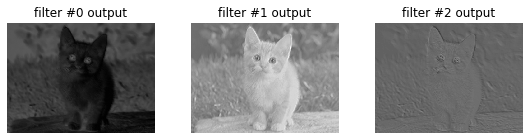

In [31]:
# helper show filter outputs
def show_filters(net):
    net.forward()
    plt.figure()
    filt_min, filt_max = net.blobs['conv'].data.min(), net.blobs['conv'].data.max()
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.title("filter #{} output".format(i))
        plt.imshow(net.blobs['conv'].data[0, i], vmin=filt_min, vmax=filt_max)
        plt.tight_layout()
        plt.axis('off')

# filter the image with initial 
show_filters(net)

Raising the bias of a filter will correspondingly raise its output:

In [32]:
# pick first filter output
conv0 = net.blobs['conv'].data[0, 0]
print("pre-surgery output mean {:.2f}".format(conv0.mean()))
# set first filter bias to 1

#0: conv ,1: bias
for idx,x in enumerate(net.params['conv']):
  print(idx,x.data.shape)
  
#initialized to zero before
net.params['conv'][1].data[0] = 1.
net.forward()
print("post-surgery output mean {:.2f}".format(conv0.mean()))

pre-surgery output mean -0.03
0 (3, 1, 5, 5)
1 (3,)
post-surgery output mean 0.97


Altering the filter weights is more exciting since we can assign any kernel like Gaussian blur, the Sobel operator for edges, and so on. The following surgery turns the 0th filter into a Gaussian blur and the 1st and 2nd filters into the horizontal and vertical gradient parts of the Sobel operator.

See how the 0th output is blurred, the 1st picks up horizontal edges, and the 2nd picks up vertical edges.

(5, 5)


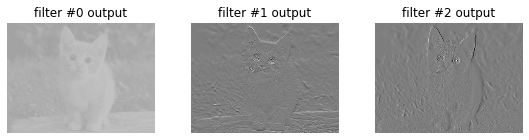

In [34]:
ksize = net.params['conv'][0].data.shape[2:]#conv 0 (3, 1, 5, 5)
print(ksize)
# make Gaussian blur
sigma = 1.
y, x = np.mgrid[-ksize[0]//2 + 1:ksize[0]//2 + 1, -ksize[1]//2 + 1:ksize[1]//2 + 1]
g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
gaussian = (g / g.sum()).astype(np.float32)
net.params['conv'][0].data[0] = gaussian
# make Sobel operator for edge detection
net.params['conv'][0].data[1:] = 0.
sobel = np.array((-1, -2, -1, 0, 0, 0, 1, 2, 1), dtype=np.float32).reshape((3,3))
net.params['conv'][0].data[1, 0, 1:-1, 1:-1] = sobel  # horizontal
net.params['conv'][0].data[2, 0, 1:-1, 1:-1] = sobel.T  # vertical
show_filters(net)

With net surgery, parameters can be transplanted across nets, regularized by custom per-parameter operations, and transformed according to your schemes.

## Casting a Classifier into a Fully Convolutional Network

Let's take the standard Caffe Reference ImageNet model "CaffeNet" and transform it into a fully convolutional net for efficient, dense inference on large inputs. This model generates a classification map that covers a given input size instead of a single classification. In particular a 8 $\times$ 8 classification map on a 451 $\times$ 451 input gives 64x the output in only 3x the time. The computation exploits a natural efficiency of convolutional network (convnet) structure by amortizing the computation of overlapping receptive fields.

To do so we translate the `InnerProduct` matrix multiplication layers of CaffeNet into `Convolutional` layers. This is the only change: the other layer types are agnostic to spatial size. Convolution is translation-invariant, activations are elementwise operations, and so on. The `fc6` inner product when carried out as convolution by `fc6-conv` turns into a 6 $\times$ 6 filter with stride 1 on `pool5`. Back in image space this gives a classification for each 227 $\times$ 227 box with stride 32 in pixels. Remember the equation for output map / receptive field size, output = (input - kernel_size) / stride + 1, and work out the indexing details for a clear understanding.

In [0]:
!diff --help

In [56]:
#!diff conv_deploy.prototxt fc_deploy.prototxt
!diff net_surgery/bvlc_caffenet_full_conv.prototxt ../models/bvlc_reference_caffenet/deploy.prototxt

1,2c1
< # Fully convolutional network version of CaffeNet.
< name: "CaffeNetConv"
---
> name: "CaffeNet"
7,11c6
<   input_param {
<     # initial shape for a fully convolutional network:
<     # the shape can be set for each input by reshape.
<     shape: { dim: 1 dim: 3 dim: 451 dim: 451 }
<   }
---
>   input_param { shape: { dim: 10 dim: 3 dim: 227 dim: 227 } }
157,158c152,153
<   name: "fc6-conv"
<   type: "Convolution"
---
>   name: "fc6"
>   type: "InnerProduct"
160,161c155,156
<   top: "fc6-conv"
<   convolution_param {
---
>   top: "fc6"
>   inner_product_param {
163d157
<     kernel_size: 6
169,170c163,164
<   bottom: "fc6-conv"
<   top: "fc6-conv"
---
>   bottom: "fc6"
>   top: "fc6"
175,176c169,170
<   bottom: "fc6-conv"
<   top: "fc6-conv"
---
>   bottom: "fc6"
>   top: "fc6"
182,186c176,180
<   name: "fc7-conv"
<   type: "Convolution"
<   bottom: "fc6-conv"
<   top: "fc7-conv"
<   convolution_param {
---
>   name: "fc7"
>   type: "InnerProduct"
>   bottom: "fc6"
>   top: "f

In [0]:
!cat net_surgery/bvlc_caffenet_full_conv.prototxt

The only differences needed in the architecture are to change the fully connected classifier inner product layers into convolutional layers with the right filter size -- 6 x 6, since the reference model classifiers take the 36 elements of `pool5` as input -- and stride 1 for dense classification. Note that the layers are renamed so that Caffe does not try to blindly load the old parameters when it maps layer names to the pretrained model.

In [36]:
!../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

...100%, 232 MB, 16411 KB/s, 14 seconds passed

###inner product parameters(fc). 
>The weight dimensions are the `(output,input)` sizes 

>The bias dimension is the `(output)` size.

In [40]:
# Load the original network and extract the fully connected layers' parameters.
net = caffe.Net('../models/bvlc_reference_caffenet/deploy.prototxt', 
                '../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel', 
                caffe.TEST)
params = ['fc6', 'fc7', 'fc8']
# fc_params = {name: (weights, biases)}
fc_params = {pr: (net.params[pr][0].data, net.params[pr][1].data) for pr in params}#params["xxx"][0]:conv params["xxx"][1]:bias

for fc in params:
    print( '{} weights are {} dimensional and biases are {} dimensional'.format(fc, fc_params[fc][0].shape, fc_params[fc][1].shape))

fc6 weights are (4096, 9216) dimensional and biases are (4096,) dimensional
fc7 weights are (4096, 4096) dimensional and biases are (4096,) dimensional
fc8 weights are (1000, 4096) dimensional and biases are (1000,) dimensional


###The convolution 

>weights are arranged in `(output,input,height,width)` dimensions. 



In [0]:
# Load the fully convolutional network to transplant the parameters.
net_full_conv = caffe.Net('net_surgery/bvlc_caffenet_full_conv.prototxt', 
                          '../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                          caffe.TEST)
params_full_conv = ['fc6-conv', 'fc7-conv', 'fc8-conv']
# conv_params = {name: (weights, biases)}
conv_params = {pr: (net_full_conv.params[pr][0].data, net_full_conv.params[pr][1].data) for pr in params_full_conv}

for conv in params_full_conv:
    print ('{} weights are {} dimensional and biases are {} dimensional'.format(conv, conv_params[conv][0].shape, conv_params[conv][1].shape))

### map

To map the inner product weights to convolution filters, we could roll the flat 

>inner product vectors into `(channel,height,width)` filter matrices.

but actually these are identical in memory (as row major arrays) so we can assign them directly.

The biases are identical to those of the inner product.

Let's transplant!

>map the inner product weights to convolution filters

In [0]:
for pr, pr_conv in zip(params, params_full_conv):
    conv_params[pr_conv][0].flat = fc_params[pr][0].flat  # flat unrolls the weights matrix
    conv_params[pr_conv][1][...] = fc_params[pr][1] # map unrolls the bias matrix

Next, save the new model weights.

In [0]:
#save model weight
net_full_conv.save('net_surgery/bvlc_caffenet_full_conv.caffemodel')

To conclude, let's make a classification map from the example cat image and visualize the confidence of "tiger cat" as a probability heatmap. This gives an 8-by-8 prediction on overlapping regions of the 451 $\times$ 451 input.

[[282 282 281 281 281 281 277 282]
 [281 283 283 281 281 281 281 282]
 [283 283 283 283 283 283 287 282]
 [283 283 283 281 283 283 283 259]
 [283 283 283 283 283 283 283 259]
 [283 283 283 283 283 283 259 259]
 [283 283 283 283 259 259 259 277]
 [335 335 283 259 263 263 263 277]]


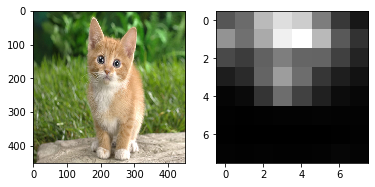

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load input and configure preprocessing
im = caffe.io.load_image('images/cat.jpg')
transformer = caffe.io.Transformer({'data': net_full_conv.blobs['data'].data.shape})
transformer.set_mean('data', np.load('../python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)

# make classification map by forward and print prediction indices at each location
out = net_full_conv.forward_all(data=np.asarray([transformer.preprocess('data', im)]))
print(out['prob'][0].argmax(axis=0))
# show net input and confidence map (probability of the top prediction at each location)
plt.subplot(1, 2, 1)
plt.imshow(transformer.deprocess('data', net_full_conv.blobs['data'].data[0]))
plt.subplot(1, 2, 2)
plt.imshow(out['prob'][0,281])

The classifications include various cats -- 282 = tiger cat, 281 = tabby, 283 = persian -- and foxes and other mammals.

In this way the fully connected layers can be extracted as dense features across an image (see `net_full_conv.blobs['fc6'].data` for instance), which is perhaps more useful than the classification map itself.

Note that this model isn't totally appropriate for sliding-window detection since it was trained for whole-image classification. Nevertheless it can work just fine. Sliding-window training and finetuning can be done by defining a sliding-window ground truth and loss such that a loss map is made for every location and solving as usual. (This is an exercise for the reader.)

*A thank you to Rowland Depp for first suggesting this trick.*